# Accessing an SQLite Database in Python

- Built in module for accessing an SQLite database, mainly need the path to the database file

- We'll look at the commonly used `chinook` database

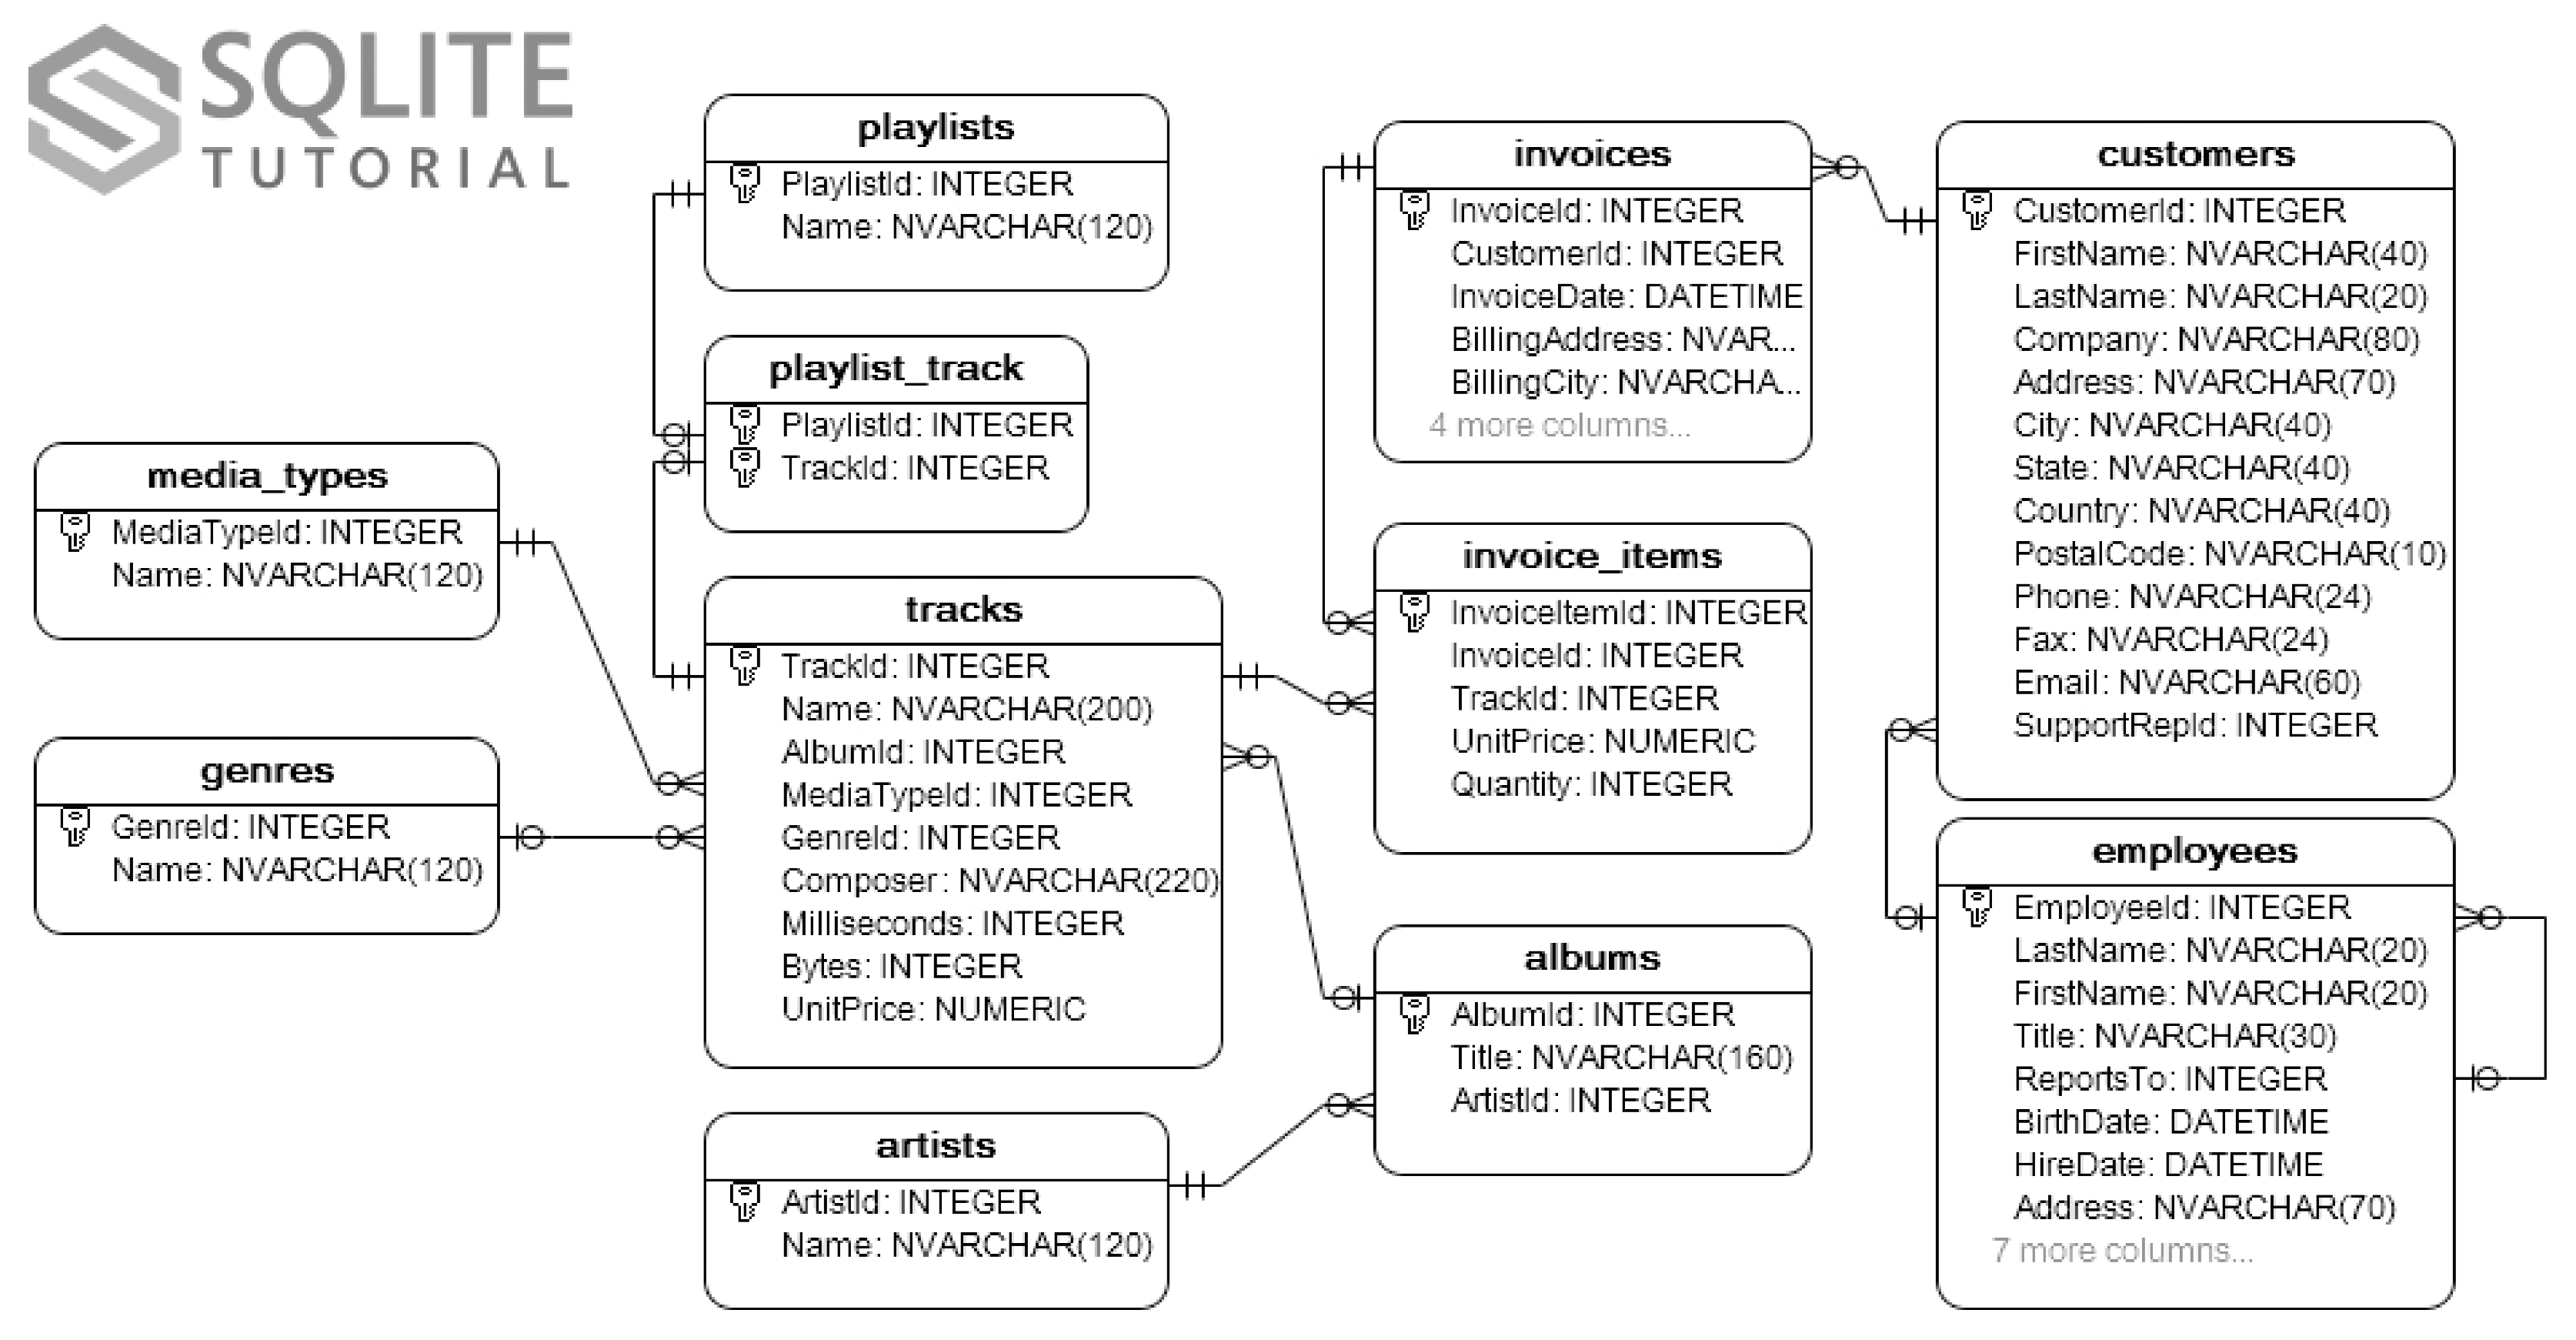

In [1]:
import sqlite3

con = sqlite3.connect("chinook.db")

Every SQLite database contains a "schema table" with information about that database.  This describes the
- tables 
- indices (special lookup tables to improve efficiency of queries)
- triggers (named database object that is executed automatically when an INSERT, UPDATE or DELETE statement is issued against the associated table)
- views (read-only tables, combinations of tables, etc.)

A schema file contains one row for each table, index, view, and trigger in the schema

We can get all of the **tables** by issuing an SQL command.  A common SQL command for querying a database:
- `SELECT column1, column2 FROM table WHERE logical_of_some_kind;`

For SQLite from python, usually we'll write our SQL command as a string and then execute it using the `execute()` method on a `cursor` object.

In [2]:
#return all table names in the data base
sql_query = '''
        SELECT name
        FROM sqlite_schema
        WHERE type = "table";
        '''
cursor = con.cursor()
cursor.execute(sql_query)
print(cursor.fetchall())
cursor.close()

[('albums',), ('sqlite_sequence',), ('artists',), ('customers',), ('employees',), ('genres',), ('invoices',), ('invoice_items',), ('media_types',), ('playlists',), ('playlist_track',), ('tracks',), ('sqlite_stat1',), ('justin_music',)]


- Use a `*` to represent you want everything that could be returned

In [3]:
#return all table info in the data base
sql_query = '''
        SELECT *
        FROM sqlite_schema
        WHERE type = "table";
        '''
cursor = con.cursor()
cursor.execute(sql_query)
print(cursor.fetchall())
cursor.close()

[('table', 'albums', 'albums', 2, 'CREATE TABLE "albums"\r\n(\r\n    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    [Title] NVARCHAR(160)  NOT NULL,\r\n    [ArtistId] INTEGER  NOT NULL,\r\n    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)'), ('table', 'sqlite_sequence', 'sqlite_sequence', 3, 'CREATE TABLE sqlite_sequence(name,seq)'), ('table', 'artists', 'artists', 4, 'CREATE TABLE "artists"\r\n(\r\n    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    [Name] NVARCHAR(120)\r\n)'), ('table', 'customers', 'customers', 5, 'CREATE TABLE "customers"\r\n(\r\n    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    [FirstName] NVARCHAR(40)  NOT NULL,\r\n    [LastName] NVARCHAR(20)  NOT NULL,\r\n    [Company] NVARCHAR(80),\r\n    [Address] NVARCHAR(70),\r\n    [City] NVARCHAR(40),\r\n    [State] NVARCHAR(40),\r\n    [Country] NVARCHAR(40),\r\n    [PostalCode] NVARCHAR(10),\r\n    [Phone] NVAR

### Now we can query a particular table!

Let's return all the albums in the `albums` table.

In [5]:
sql_query = '''
        SELECT *
        FROM albums
        LIMIT 20;
        '''
cursor = con.cursor()
res = cursor.execute(sql_query)
for row in res:
    print(row)
cursor.close()

(1, 'For Those About To Rock We Salute You', 1)
(2, 'Balls to the Wall', 2)
(3, 'Restless and Wild', 2)
(4, 'Let There Be Rock', 1)
(5, 'Big Ones', 3)
(6, 'Jagged Little Pill', 4)
(7, 'Facelift', 5)
(8, 'Warner 25 Anos', 6)
(9, 'Plays Metallica By Four Cellos', 7)
(10, 'Audioslave', 8)
(11, 'Out Of Exile', 8)
(12, 'BackBeat Soundtrack', 9)
(13, 'The Best Of Billy Cobham', 10)
(14, 'Alcohol Fueled Brewtality Live! [Disc 1]', 11)
(15, 'Alcohol Fueled Brewtality Live! [Disc 2]', 11)
(16, 'Black Sabbath', 12)
(17, 'Black Sabbath Vol. 4 (Remaster)', 12)
(18, 'Body Count', 13)
(19, 'Chemical Wedding', 14)
(20, 'The Best Of Buddy Guy - The Millenium Collection', 15)


## Process for doing a CRUD activity 

(**C**reate, **R**ead, **U**pdate, **D**elete)

- Create a connection using `sqlite3.connect(path)`
- Create a `cursor` [object](https://docs.python.org/3/library/sqlite3.html#sqlite3.Cursor) associated with the connection
- Write an SQL query as a string
- Use `cursor.execute()` (or `cursor.executemany()`) to execute the SQL

## Common SQL commands

- CREATE TABLE - creates a new table
- INSERT INTO - adds records to a table
- UPDATE - modify existing records
- DELETE FROM - deletes data 
- DROP TABLE - removes a table
- SELECT - reads data (use `fetchone()`, `fetchall()`, or the returned value as an iterator)

Also many important **joins** we'll cover shortly.

### Create 
Let's start by creating a table.  We write the SQL code and specify the name of the table and and variables.

In [11]:
cursor = con.cursor()
ct = """
    CREATE TABLE IF NOT EXISTS justin_music (
        album TEXT, 
        artist TEXT);
"""
cursor.execute(ct)

#Check that it worked
check = '''
        SELECT name
        FROM sqlite_schema
        WHERE type = "table";
        '''
cursor = con.cursor()
print(cursor.execute(check).fetchall())

[('albums',), ('sqlite_sequence',), ('artists',), ('customers',), ('employees',), ('genres',), ('invoices',), ('invoice_items',), ('media_types',), ('playlists',), ('playlist_track',), ('tracks',), ('sqlite_stat1',), ('justin_music',)]


You can see we'll do this process a lot.  Probably best to create a function to help us out.  (Modified from https://realpython.com/python-sql-libraries/)

In [12]:
def execute_query(connection, query, result = None):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Query executed successfully")
        if result == "one":
            print(cursor.fetchone())
        elif result == "all":
            print(cursor.fetchall())
    except Error as e:
        print(f"The error '{e}' occurred")

execute_query(con, check, result = "all")

Query executed successfully
[('albums',), ('sqlite_sequence',), ('artists',), ('customers',), ('employees',), ('genres',), ('invoices',), ('invoice_items',), ('media_types',), ('playlists',), ('playlist_track',), ('tracks',), ('sqlite_stat1',), ('justin_music',)]


### INSERT INTO

Now lets add some data to our table using `INSERT INTO`.  We need to pass the table name, optionally the columns we'll specify, and the values to fill with.

In [13]:
create_rows = """
       INSERT INTO 
           justin_music (album, artist)
       VALUES
           ("Sixteen Stone", "Bush"),
           ("Listener Supported", "Dave Matthews Band"),
           ("Chris Stapleton", "Traveler"),
           ("1989", "Taylor Swift");
"""

execute_query(con, create_rows)

Query executed successfully


In [14]:
execute_query(con, "SELECT * FROM justin_music", "all")

Query executed successfully
[('Sixteen Stone', 'Bush'), ('Listener Supported', 'Dave Matthews Band'), ('Chris Stapleton', 'Traveler'), ('1989', 'Taylor Swift')]


Now let's add a row with only an artist.

In [15]:
create_row = """
       INSERT INTO 
           justin_music (artist)
       VALUES
           ("Taylor Swift");
"""

execute_query(con, create_row)

Query executed successfully


In [16]:
execute_query(con, "SELECT * FROM justin_music", "all")

Query executed successfully
[('Sixteen Stone', 'Bush'), ('Listener Supported', 'Dave Matthews Band'), ('Chris Stapleton', 'Traveler'), ('1989', 'Taylor Swift'), (None, 'Taylor Swift')]


### UPDATE

We can use update to modify an existing row of data.  We use UPDATE, specify the table, use SET to specify the values of the columns, and WHERE to describe which records (rows) to modify.

In [17]:
mod_row = """
    UPDATE justin_music
    SET album = "Red (Taylor's Version)", artist = "Taylor Swift"
    WHERE (album is null) AND (artist = "Taylor Swift");
"""

execute_query(con, mod_row)

Query executed successfully


In [18]:
execute_query(con, "SELECT * FROM justin_music", "all")

Query executed successfully
[('Sixteen Stone', 'Bush'), ('Listener Supported', 'Dave Matthews Band'), ('Chris Stapleton', 'Traveler'), ('1989', 'Taylor Swift'), ("Red (Taylor's Version)", 'Taylor Swift')]


## DELETE FROM

We can also delete certain rows.  We use DELETE FROM, specify the table, and a WHERE condition.


In [19]:
del_row = """
    DELETE FROM justin_music
    WHERE artist = "Taylor Swift";
    """

execute_query(con, del_row)

Query executed successfully


In [20]:
execute_query(con, "SELECT * FROM justin_music", "all")

Query executed successfully
[('Sixteen Stone', 'Bush'), ('Listener Supported', 'Dave Matthews Band'), ('Chris Stapleton', 'Traveler')]


### DROP TABLE

And of course we can remove an entire table using DROP TABLE.  Just specify the table to remove.

In [21]:
execute_query(con, "DROP TABLE justin_music")

Query executed successfully


In [22]:
execute_query(con, check, result = "all")

Query executed successfully
[('albums',), ('sqlite_sequence',), ('artists',), ('customers',), ('employees',), ('genres',), ('invoices',), ('invoice_items',), ('media_types',), ('playlists',), ('playlist_track',), ('tracks',), ('sqlite_stat1',)]


## SELECT

As a statistician, you'd spend most of your time pull data of interest and then summarizing it, running models, etc.  `SELECT` is the workhorse for that task.

We'll create a function specifically for selecting.


In [24]:
def select(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        result = cursor.execute(query)
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

With SELECT we pass the column(s) we want FROM the table of interest, and specify the records (rows) of interest with a WHERE.

First, let's see a way to look at all columns in a table.

In [27]:
album = '''
        SELECT *
        FROM albums;
        '''
album_data = select(con, album)
for col in album_data.description:
    print(col[0])

AlbumId
Title
ArtistId


Now let's select the Title and ArtistID columns only.  `LIMIT` is a good way to only return (up to) a certain number of results.

In [28]:
select(con, "SELECT Title, artistID FROM albums LIMIT 10;").fetchall()

[('For Those About To Rock We Salute You', 1),
 ('Balls to the Wall', 2),
 ('Restless and Wild', 2),
 ('Let There Be Rock', 1),
 ('Big Ones', 3),
 ('Jagged Little Pill', 4),
 ('Facelift', 5),
 ('Warner 25 Anos', 6),
 ('Plays Metallica By Four Cellos', 7),
 ('Audioslave', 8)]

WHERE allows us to specify conditions on rows.

In [30]:
select(con, "SELECT * FROM albums WHERE artistID = 2 LIMIT 10;").fetchall()

[(2, 'Balls to the Wall', 2), (3, 'Restless and Wild', 2)]

Ok, so the above is straight SQL code.  That's a great skill to learn.  We can easily switch to using `pandas` to turn the result into easy to work with data frames!

In [36]:
import pandas as pd

The function `pd.read_sql(sql, con)` returns the results as a data frame.

In [32]:
pd.read_sql("SELECT Title, artistID FROM albums LIMIT 10;", con)

,Title,ArtistId
0,For Those About To Rock We Salute You,1
1,Balls to the Wall,2
2,Restless and Wild,2
3,Let There Be Rock,1
4,Big Ones,3
5,Jagged Little Pill,4
6,Facelift,5
7,Warner 25 Anos,6
8,Plays Metallica By Four Cellos,7
9,Audioslave,8


In [33]:
pd.read_sql("SELECT * FROM tracks", con)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


Niiiice! That's now going to be very easy to summarize and plot.

## Clean Up

If we want to save any changes made to our database, we need to do a `commit()` to the connection via `con.commit()`.  This saves the changes made and releases any locks on the data.  Other connections to the database can only see changes you've made if you commit them.

When you are doing working you should also close your connection.  This is done with the `close()` method.

In [34]:
con.close()

We skimmed over some of the syntax that SQL follows.  You should read over the [arithmetic operators](https://www.w3resource.com/sqlite/arithmetic-operators.php), [comparison operators](https://www.w3resource.com/sqlite/comparison-operators.php), and the other operators linked on the left of that page.

# SQL Joins on chinook

Now let's do some joins on the chinook database.  We'll reread in the packages are make our connection to the database.

In [1]:
import sqlite3
import pandas as pd
con = sqlite3.connect("chinook.db")

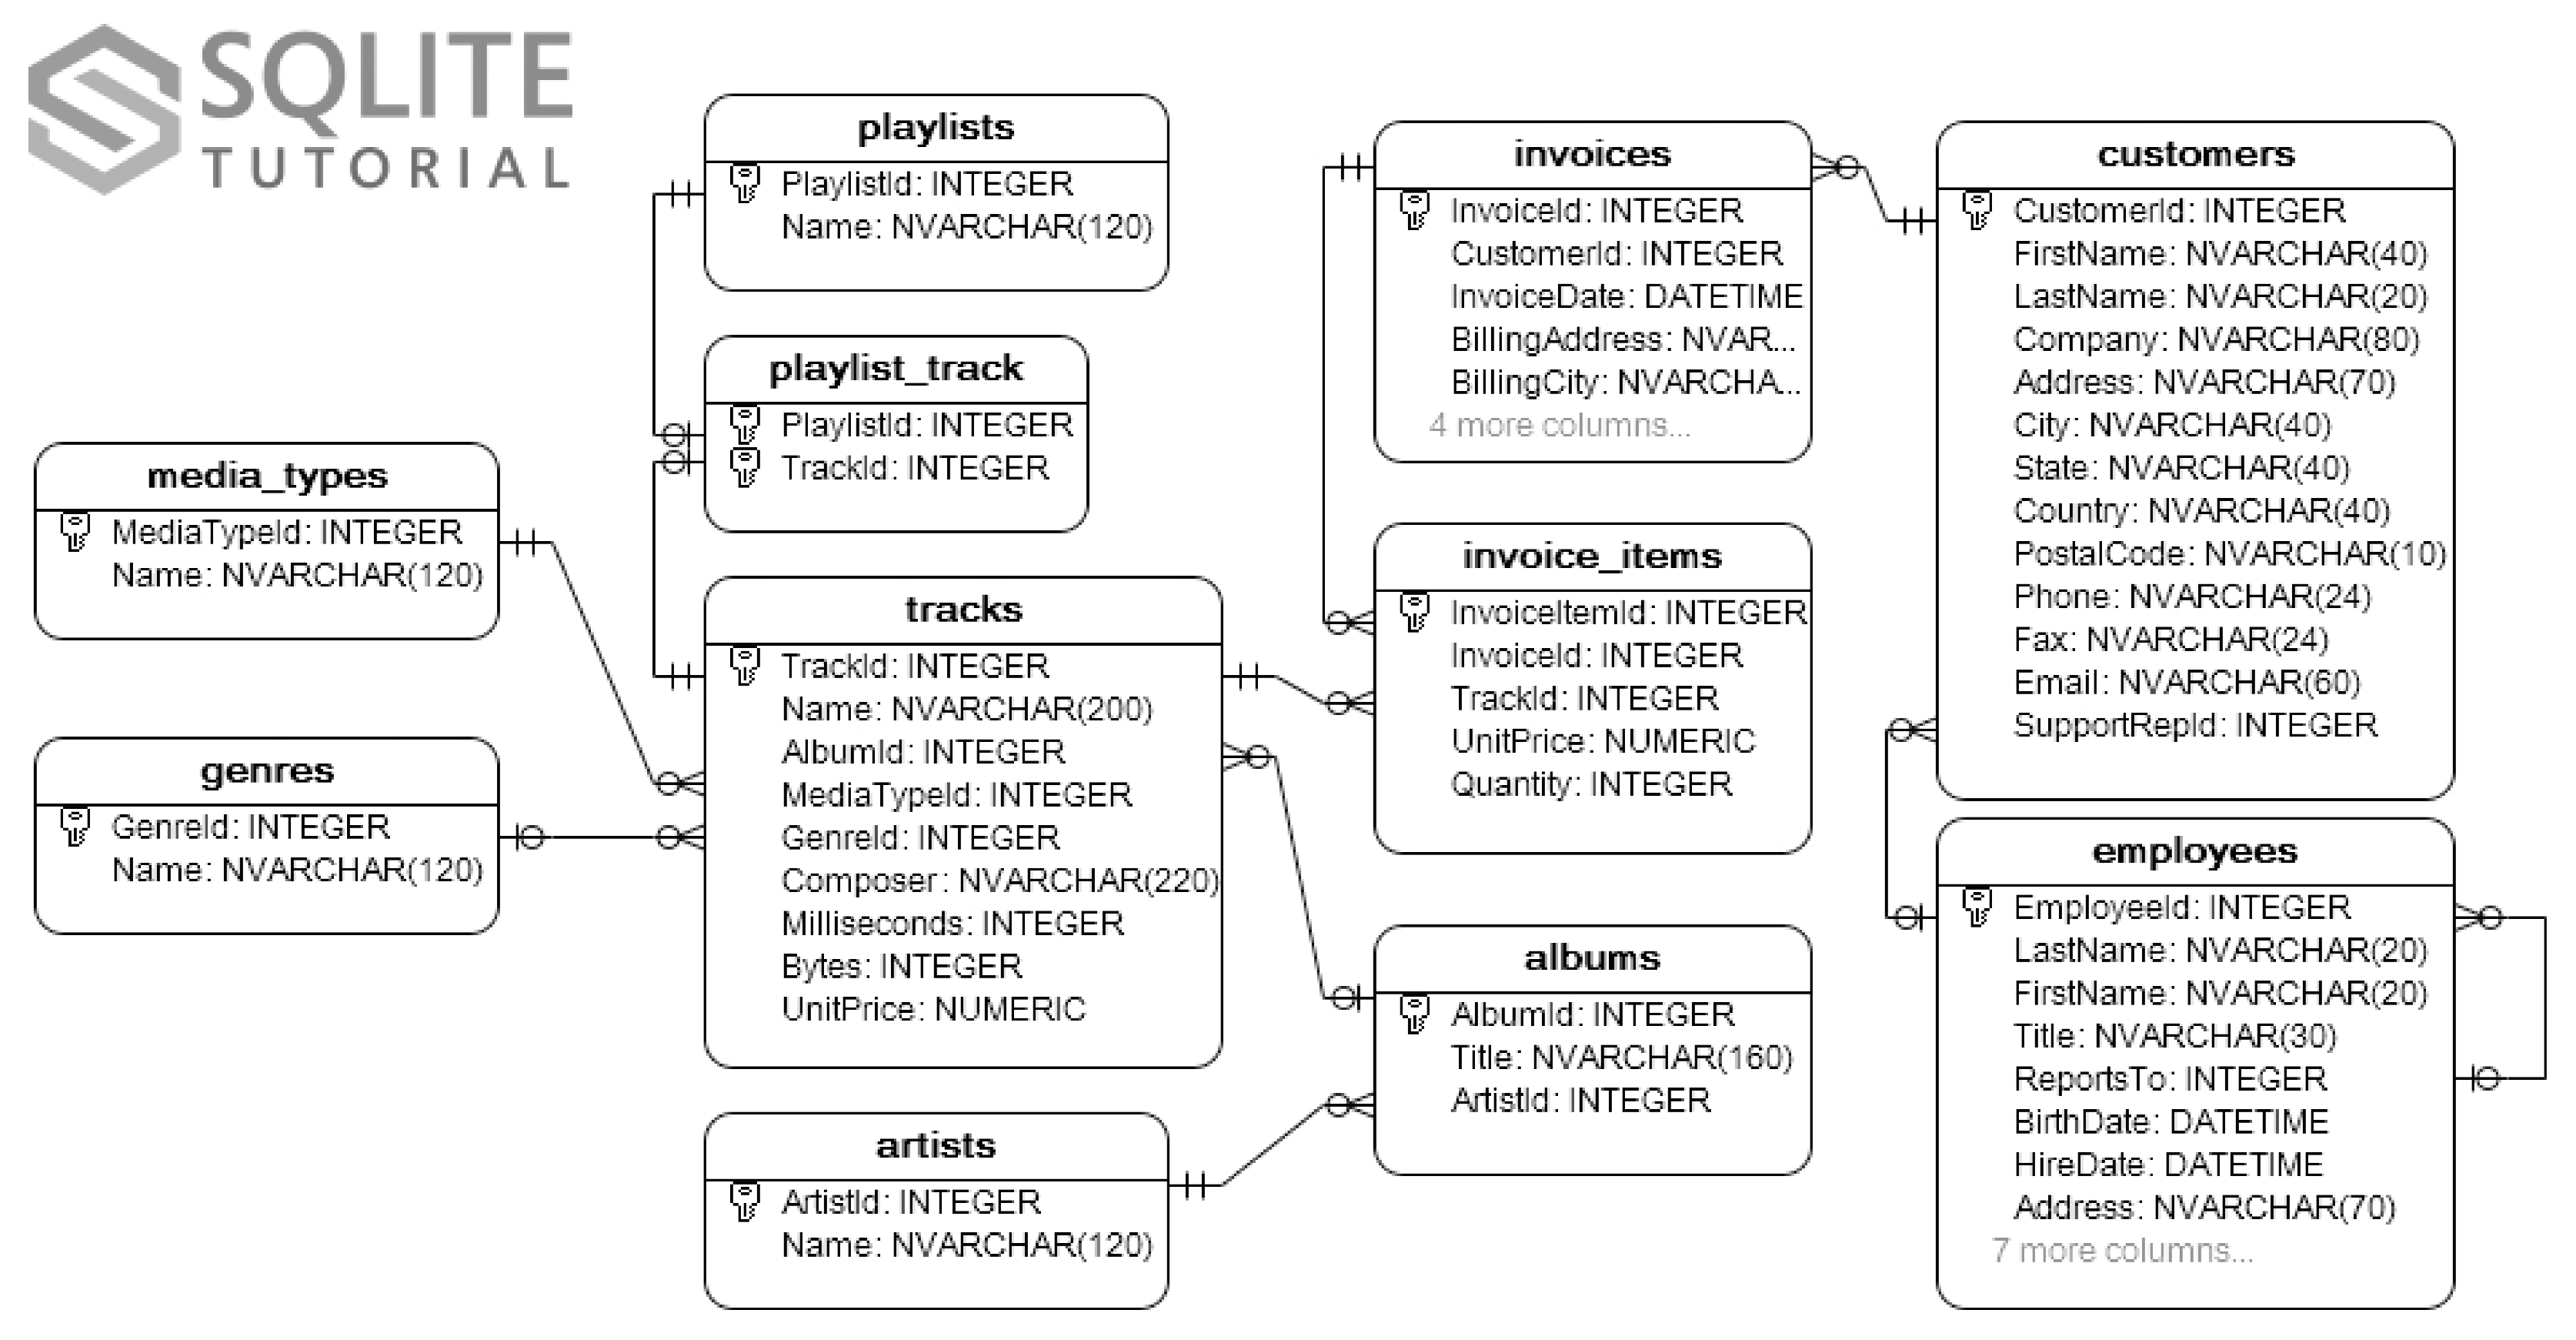

Using pandas we can check out the tables returned as a data frame.

In [2]:
pd.read_sql("SELECT * FROM sqlite_schema WHERE type = 'table';", con)

,type,name,tbl_name,rootpage,sql
0,table,albums,albums,2,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,artists,artists,4,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,customers,customers,5,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,employees,employees,8,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,genres,genres,10,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,invoices,invoices,11,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,invoice_items,invoice_items,13,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,media_types,media_types,15,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,playlists,playlists,16,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


The tracks and albums tables each share a variable/column/key of `AlbumId`.  Let's do an inner join on those using `pd.merge()`.  Remember that we can pull the full tables into pandas using `pd.read_sql()` and then use `pandas` to do the join!

In [3]:
tracks_albums = pd.merge(left = pd.read_sql("SELECT * FROM tracks", con), right = pd.read_sql("SELECT * FROM albums", con),
         how = "inner", 
         on = "AlbumId")
tracks_albums

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice,Title,ArtistId
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,For Those About To Rock We Salute You,1
1,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99,For Those About To Rock We Salute You,1
2,7,Let's Get It Up,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99,For Those About To Rock We Salute You,1
3,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99,For Those About To Rock We Salute You,1
4,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99,For Those About To Rock We Salute You,1
...,...,...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99,Respighi:Pines of Rome,226
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99,Schubert: The Late String Quartets & String Qu...,272
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99,Monteverdi: L'Orfeo,273
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99,Mozart: Chamber Music,274


Now we'll join that table we just made with another table, `invoice_items` and do a left join (treating `invoice_items` as the left table).  We'll join on the key that is shared, `trackId`.

In [46]:
next = pd.merge(left = pd.read_sql("SELECT * FROM invoice_items", con), 
         right= tracks_albums,
         how = "left",
         on = "TrackId")
next

,InvoiceLineId,InvoiceId,TrackId,UnitPrice_x,Quantity,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice_y,Title,ArtistId
0,1,1,2,0.99,1,Balls to the Wall,2,2,1,None,342562,5510424,0.99,Balls to the Wall,2
1,2,1,4,0.99,1,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,Restless and Wild,2
2,3,2,6,0.99,1,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99,For Those About To Rock We Salute You,1
3,4,2,8,0.99,1,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99,For Those About To Rock We Salute You,1
4,5,2,10,0.99,1,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99,For Those About To Rock We Salute You,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2236,411,3136,0.99,1,Looking For Love,141,1,3,Sykes,391941,12769847,0.99,Greatest Hits,100
2236,2237,411,3145,0.99,1,Sweet Lady Luck,141,1,3,Vandenberg,273737,8919163,0.99,Greatest Hits,100
2237,2238,411,3154,0.99,1,Feirinha da Pavuna/Luz do Repente/Bagaço da La...,248,1,7,"Arlindo Cruz/Franco/Marquinhos PQD/Negro, Jove...",107206,3593684,0.99,Ao Vivo [IMPORT],155
2238,2239,411,3163,0.99,1,Samba pras moças,248,1,7,Grazielle/Roque Ferreira,152816,5121366,0.99,Ao Vivo [IMPORT],155


Lastly, we'll now combine that table with the `invoices` table using an outer join on the key `InvoiceId`.  Note that you can actually do all of these joins in SQL using one call (which is likely much more efficient!).  Please see the additional readings for topic 2 for more information.

In [48]:
pd.merge(left = pd.read_sql("SELECT * FROM invoices", con),
         right = next,
         how = "outer",
         on = "InvoiceId")

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total,InvoiceLineId,...,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice_y,Title,ArtistId
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98,1,...,Balls to the Wall,2,2,1,None,342562,5510424,0.99,Balls to the Wall,2
1,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98,2,...,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,Restless and Wild,2
2,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96,3,...,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99,For Those About To Rock We Salute You,1
3,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96,4,...,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99,For Those About To Rock We Salute You,1
4,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96,5,...,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99,For Those About To Rock We Salute You,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86,2236,...,Looking For Love,141,1,3,Sykes,391941,12769847,0.99,Greatest Hits,100
2236,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86,2237,...,Sweet Lady Luck,141,1,3,Vandenberg,273737,8919163,0.99,Greatest Hits,100
2237,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86,2238,...,Feirinha da Pavuna/Luz do Repente/Bagaço da La...,248,1,7,"Arlindo Cruz/Franco/Marquinhos PQD/Negro, Jove...",107206,3593684,0.99,Ao Vivo [IMPORT],155
2238,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86,2239,...,Samba pras moças,248,1,7,Grazielle/Roque Ferreira,152816,5121366,0.99,Ao Vivo [IMPORT],155
